## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt

import time

import yfinance as yf

import os

import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

from plotly.subplots import make_subplots

from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

## Constants

In [33]:
PATH = "Data/"

# Start End date defaults
S_DATE = "2012-01-01"
E_DATE = "2023-01-01"
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

## Get Stock File Names in a List

In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers.sort()
len(tickers)

4105

## Function that returns a Dataframe from a CSV

In [19]:
# Reads a dataframe from CSV file, changes index to date and returns it
def get_stock_df_from_csv(ticker):

    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col=0)
    except FileNotFoundError:
        print(ticker, " doesn't exist")
    else:
        return df

## Merge multiple Stocks in one DataFrame by Column Name

In [9]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()

    for x in tickers:
        df = get_stock_df_from_csv(x)

        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]

    return mult_df

## Markowitz Portfolio Optimkization (or Modern Portfolio Theory - MPT)

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight.

$ w_1r_1 + w_2r_2 = r_p $

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.

$ (w_1\sigma_1 + w_2\sigma_2)^2 = w_1^2\sigma_1^2 + 2w_1\sigma_1w_2\sigma_2\rho_1 + w_2^2\sigma_2^2 $

## Plotting an Efficient Frontier

## Stock Portfolio

In [21]:
# Using Reliance Model Portfolio 2022 for testing
port_list = [
    'HDFC_BO',
    'DABUR_BO',
    'SBIN_BO',
    'TITAN_BO',
    'HDFCBANK_BO',
    'ASHOKLEY_BO',
    'SAGCEM_BO',
    'CHOLAFIN_BO',
    'ICICIBANK_BO',
    'HCLTECH_BO',
    'CADILAHC_BO',
    'BHARTIARTL_BO',
    'IGL_BO',
    'TECHM_BO',
    'KNRCON_BO',
    'BAJAJ-AUTO_BO',
    'GUJGAS_BO',
    'LAURUSLABS_BO'
]

num_stocks = len(port_list)
num_stocks

18

## Merge all data by Closing Price

In [22]:
mult_df = merge_df_by_column_name('Close', S_DATE, E_DATE, *port_list)
mult_df

,HDFC_BO,DABUR_BO,SBIN_BO,TITAN_BO,HDFCBANK_BO,ASHOKLEY_BO,SAGCEM_BO,CHOLAFIN_BO,ICICIBANK_BO,HCLTECH_BO,CADILAHC_BO,BHARTIARTL_BO,IGL_BO,TECHM_BO,KNRCON_BO,BAJAJ-AUTO_BO,GUJGAS_BO,LAURUSLABS_BO
Date,,,,,,,,,,,,,,,,,,
2012-02-01,597.497559,86.305511,188.715088,185.490234,232.490005,22.486780,165.610703,27.553577,140.779190,91.794792,116.376831,316.117676,64.561691,135.930923,24.480114,1242.714844,NaN,NaN
2012-02-02,595.847107,86.798180,188.310791,183.417206,233.004868,21.147814,167.536377,28.009607,142.982346,96.645363,117.614716,337.872101,64.695679,138.555313,24.578272,1238.814819,NaN,NaN
2012-02-03,604.186646,87.559555,191.077332,185.113297,237.006882,20.793381,164.524399,28.155546,144.995285,95.042458,120.046204,340.192078,64.588486,135.754562,23.989334,1243.757446,NaN,NaN
2012-02-06,606.228210,88.768829,196.524109,186.809418,237.170700,20.832762,166.943893,28.894314,147.063705,97.032990,119.268127,340.104523,62.748466,133.897720,23.783207,1266.694336,NaN,NaN
2012-02-07,595.629944,89.127129,195.524689,188.128662,238.551468,20.281422,164.870041,29.496281,148.498093,96.530113,116.686310,331.744110,59.479298,133.296097,23.704683,1263.257568,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25,2528.149902,543.200012,514.849976,2379.399902,1487.250000,130.850006,245.850006,643.700012,801.549988,1124.800049,395.700012,711.900024,399.500000,1500.500000,298.049988,3464.949951,691.750000,474.649994
2022-01-27,2503.899902,529.500000,529.000000,2310.449951,1476.300049,131.100006,243.399994,654.000000,794.000000,1077.900024,383.950012,707.200012,393.149994,1445.650024,298.549988,3498.649902,689.599976,463.799988
2022-01-28,2518.500000,533.900024,523.349976,2316.000000,1463.300049,130.949997,242.649994,640.000000,781.099976,1080.500000,396.100006,715.900024,394.450012,1410.550049,302.200012,3499.000000,676.750000,499.500000


## Plot Price of Investments over Total Dataset

In [ ]:
# Plot price for each stock since 2012
fig = px.line(mult_df, x=mult_df.index, y=mult_df.columns)
fig.update_xaxes(title='Date', rangeslider_visible=True)
fig.update_yaxes(title='Price')
fig.update_layout(height=1200, width=1800, showlegend=True)
fig.show()

## Cumulative Return for all Stocks

In [24]:
mult_cum_df = merge_df_by_column_name('cum_return', S_DATE, E_DATE, *port_list)
mult_cum_df

,HDFC_BO,DABUR_BO,SBIN_BO,TITAN_BO,HDFCBANK_BO,ASHOKLEY_BO,SAGCEM_BO,CHOLAFIN_BO,ICICIBANK_BO,HCLTECH_BO,CADILAHC_BO,BHARTIARTL_BO,IGL_BO,TECHM_BO,KNRCON_BO,BAJAJ-AUTO_BO,GUJGAS_BO,LAURUSLABS_BO
Date,,,,,,,,,,,,,,,,,,
2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-02,0.997238,1.005708,0.997858,0.988824,1.002215,0.940455,1.011628,1.016551,1.015650,1.052841,1.010637,1.068817,1.002075,1.019307,1.004010,0.996862,NaN,NaN
2012-02-03,1.011195,1.014530,1.012518,0.997968,1.019428,0.924694,0.993441,1.021847,1.029948,1.035380,1.031530,1.076156,1.000415,0.998703,0.979952,1.000839,NaN,NaN
2012-02-06,1.014612,1.028542,1.041380,1.007112,1.020133,0.926445,1.008050,1.048659,1.044641,1.057064,1.024844,1.075879,0.971915,0.985042,0.971532,1.019296,NaN,NaN
2012-02-07,0.996874,1.032693,1.036084,1.014224,1.026072,0.901926,0.995528,1.070506,1.054830,1.051586,1.002659,1.049432,0.921278,0.980616,0.968324,1.016531,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25,4.231231,6.293920,2.728187,12.827629,6.397049,5.818975,1.484506,23.361758,5.693668,12.253419,3.400161,2.252010,6.187880,11.038695,12.175188,2.788210,5.833240,5.290779
2022-01-27,4.190645,6.135182,2.803167,12.455912,6.349951,5.830092,1.469712,23.735575,5.640038,11.742496,3.299196,2.237142,6.089524,10.635181,12.195613,2.815328,5.815110,5.169837
2022-01-28,4.215080,6.186164,2.773228,12.485833,6.294034,5.823421,1.465183,23.227474,5.548405,11.770820,3.403598,2.264663,6.109660,10.376962,12.344714,2.815610,5.706751,5.567774


In [ ]:
# Plot cumulative returns for each stock since 2012
fig = px.line(mult_cum_df, x=mult_cum_df.index, y=mult_cum_df.columns)
fig.update_xaxes(title='Date', rangeslider_visible=True)
fig.update_yaxes(title='Cumulative Return')
fig.update_layout(height=1200, width=1800, showlegend=True)
fig.show()

## Mean Returns

In [26]:
returns = np.log(mult_df/mult_df.shift(1))
mean_ret = returns.mean()*252 # 252 average trading days per year
mean_ret

HDFC_BO          0.148972
DABUR_BO         0.188740
SBIN_BO          0.106044
TITAN_BO         0.263200
HDFCBANK_BO      0.190565
ASHOKLEY_BO      0.179959
SAGCEM_BO        0.044183
CHOLAFIN_BO      0.323762
ICICIBANK_BO     0.178948
HCLTECH_BO       0.256982
CADILAHC_BO      0.127993
BHARTIARTL_BO    0.084574
IGL_BO           0.186145
TECHM_BO         0.246044
KNRCON_BO        0.259855
BAJAJ-AUTO_BO    0.106875
GUJGAS_BO        0.280437
LAURUSLABS_BO    0.351733
dtype: float64

## Correlation

In [27]:
# We want great performing stocks that go up when others go down to smooth the returns over the year
returns.corr()

,HDFC_BO,DABUR_BO,SBIN_BO,TITAN_BO,HDFCBANK_BO,ASHOKLEY_BO,SAGCEM_BO,CHOLAFIN_BO,ICICIBANK_BO,HCLTECH_BO,CADILAHC_BO,BHARTIARTL_BO,IGL_BO,TECHM_BO,KNRCON_BO,BAJAJ-AUTO_BO,GUJGAS_BO,LAURUSLABS_BO
HDFC_BO,1.000000,0.234586,0.447481,0.330727,0.649693,0.307864,0.086985,0.367707,0.515960,0.199781,0.154719,0.300022,0.223612,0.187600,0.186996,0.355030,0.216119,0.181216
DABUR_BO,0.234586,1.000000,0.205626,0.269062,0.208390,0.173929,0.062390,0.225255,0.227878,0.190999,0.213750,0.221100,0.153245,0.204066,0.099910,0.269292,0.196279,0.217864
SBIN_BO,0.447481,0.205626,1.000000,0.288392,0.446930,0.424429,0.104060,0.346117,0.669652,0.123062,0.179640,0.288345,0.227337,0.175497,0.222812,0.309273,0.221873,0.189736
TITAN_BO,0.330727,0.269062,0.288392,1.000000,0.339119,0.288027,0.053672,0.299671,0.328531,0.156853,0.142343,0.217893,0.198417,0.161898,0.140564,0.298780,0.194963,0.228796
HDFCBANK_BO,0.649693,0.208390,0.446930,0.339119,1.000000,0.329345,0.100784,0.352066,0.548515,0.188679,0.123023,0.296858,0.205301,0.192981,0.163277,0.386464,0.219378,0.191187
ASHOKLEY_BO,0.307864,0.173929,0.424429,0.288027,0.329345,1.000000,0.099820,0.368076,0.400459,0.143425,0.191215,0.232100,0.269493,0.159997,0.187350,0.324651,0.243452,0.197735
SAGCEM_BO,0.086985,0.062390,0.104060,0.053672,0.100784,0.099820,1.000000,0.119882,0.105662,0.069638,0.057981,0.065728,0.100404,0.080225,0.057080,0.098731,0.098054,0.098908
CHOLAFIN_BO,0.367707,0.225255,0.346117,0.299671,0.352066,0.368076,0.119882,1.000000,0.376770,0.113383,0.151605,0.229199,0.222115,0.162396,0.172417,0.279606,0.246355,0.195767
ICICIBANK_BO,0.515960,0.227878,0.669652,0.328531,0.548515,0.400459,0.105662,0.376770,1.000000,0.166894,0.141230,0.298481,0.238544,0.202634,0.183403,0.336784,0.229500,0.210939
HCLTECH_BO,0.199781,0.190999,0.123062,0.156853,0.188679,0.143425,0.069638,0.113383,0.166894,1.000000,0.142533,0.124179,0.152786,0.453867,0.062309,0.174245,0.158475,0.183320


## Generate Random Weights equal to 1

In [30]:
# Generate 18 random values that sum to 1
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print("Weights: ", weights)
print("Total Weight: ", np.sum(weights))

Weights:  [0.07058168 0.06266297 0.09621775 0.05570376 0.06602016 0.07578006
 0.07379593 0.0578269  0.01680671 0.03619881 0.00405716 0.05563905
 0.09690714 0.02458916 0.06344087 0.00823413 0.03927122 0.09626655]
Total Weight:  0.9999999999999999


## Calculating Return of Portfolio using a Random Weighting

In [31]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights*returns.mean())*252

0.19926972377643032

## Calculating Volatility

In [32]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))

0.18608970975539046

## Analyze Returns & Risks of 10000 Combinations

In [34]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list

for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)

    # Add return using those weights to list
    ret_1 = np.sum(p_weights*returns.mean())*252
    p_ret.append(ret_1)

    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov()*252, p_weights)))
    p_vol.append(vol_1)

    # Get Sharpe Ratio
    SR_1 = (ret_1 - risk_free_rate)/vol_1
    p_SR.append(SR_1)

    # Store the weights for each portfolio
    p_wt.append(p_weights)

# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_wt

(array([0.21679167, 0.19454827, 0.17867013, ..., 0.20984759, 0.19405946,
        0.20454043]),
 array([0.18014927, 0.18977175, 0.18349816, ..., 0.18416043, 0.18224657,
        0.17912516]),
 array([[0.0708145 , 0.01858969, 0.04214874, ..., 0.03524624, 0.06141573,
         0.09181405],
        [0.03161721, 0.05480657, 0.05863923, ..., 0.06074835, 0.05324264,
         0.00163808],
        [0.05070635, 0.02674503, 0.03552061, ..., 0.0816045 , 0.01566836,
         0.02968815],
        ...,
        [0.04326748, 0.01259308, 0.03992862, ..., 0.04194398, 0.09762236,
         0.09682852],
        [0.09130371, 0.06010953, 0.1107329 , ..., 0.05598622, 0.0118158 ,
         0.10486163],
        [0.01210238, 0.10408324, 0.10216153, ..., 0.02608074, 0.04047415,
         0.0354637 ]]))

## Plotting the Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

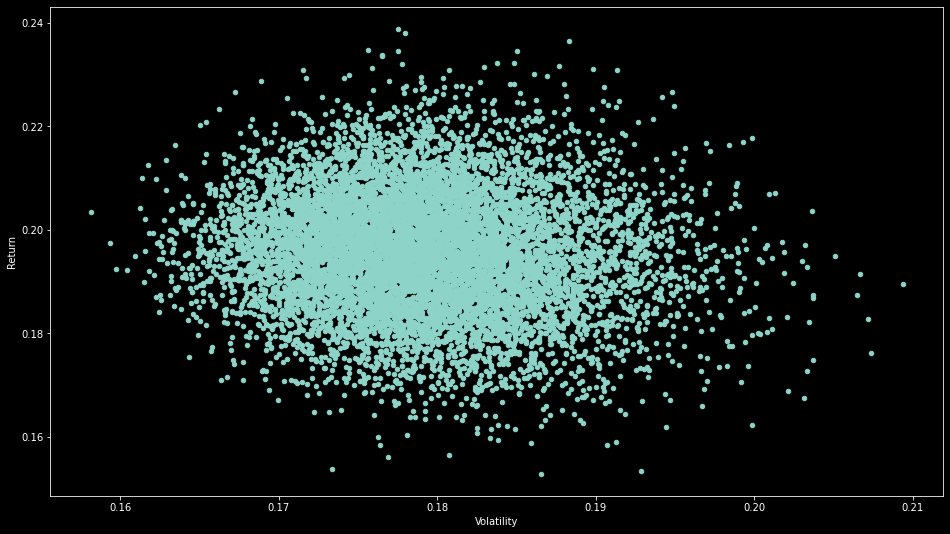

In [37]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

plt.style.use("dark_background")
ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

## Sharpe Ratio

People want to maximize returns while avoiding as much risk as possible. William Sharpe created the Sharpe Ratio to find the portfolio that provides the best return for the lowest amount of risk.

_Sharpe Ratio_ = $\frac{r_i - r_f}{\sigma_i}$

$r_f =$ Risk Free Rate

$r_i =$ Rate of Return of the stock

$\sigma_i =$ Standard Deviation of the Stock

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ration decreases.

In [39]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print(f"Stock: {port_list[i]}: {p_wt[SR_idx][i]*100}")
    i += 1

# Find volatility of that portfolio
print("\nVolatility: ", p_vol[SR_idx])

# Find return of that portfolio
print("Return: ", p_ret[SR_idx])

Stock: HDFC_BO: 2.398255426655767
Stock: DABUR_BO: 6.454026440626784
Stock: SBIN_BO: 6.157960788545698
Stock: TITAN_BO: 3.2128799628238993
Stock: HDFCBANK_BO: 8.805323479490422
Stock: ASHOKLEY_BO: 2.929814790871739
Stock: SAGCEM_BO: 1.0327058639516105
Stock: CHOLAFIN_BO: 5.052848133514233
Stock: ICICIBANK_BO: 3.3075233047226282
Stock: HCLTECH_BO: 12.49412098714192
Stock: CADILAHC_BO: 4.904964900346758
Stock: BHARTIARTL_BO: 0.6778643744912901
Stock: IGL_BO: 6.736355340669392
Stock: TECHM_BO: 6.228342222883359
Stock: KNRCON_BO: 6.356934304333303
Stock: BAJAJ-AUTO_BO: 1.5953362794794652
Stock: GUJGAS_BO: 11.130205227095255
Stock: LAURUSLABS_BO: 10.524538172356483

Volatility:  0.16886449858304842
Return:  0.22880520663370518


In [42]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

## Get Portfolio Weighting

In [40]:
def get_port_weighting(share_cost):

    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment: ", tot_val)

    for x in share_cost:
        stock_wts.append(x/tot_val)
    return stock_wts

## Return the Value of Portfolio by Date

In [41]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Close', date, date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

## Approximate Portfolio Weighting Based on Request

In [44]:
port_list = [
    'HDFC_BO',
    'DABUR_BO',
    'SBIN_BO',
    'TITAN_BO',
    'HDFCBANK_BO',
    'ASHOKLEY_BO',
    'SAGCEM_BO',
    'CHOLAFIN_BO',
    'ICICIBANK_BO',
    'HCLTECH_BO',
    'CADILAHC_BO',
    'BHARTIARTL_BO',
    'IGL_BO',
    'TECHM_BO',
    'KNRCON_BO',
    'BAJAJ-AUTO_BO',
    'GUJGAS_BO',
    'LAURUSLABS_BO'
]

port_wts = [
    2.398255426655767,
    6.454026440626784,
    6.157960788545698,
    3.2128799628238993,
    8.805323479490422,
    2.929814790871739,
    1.0327058639516105,
    5.052848133514233,
    3.3075233047226282,
    12.49412098714192,
    4.904964900346758,
    0.6778643744912901,
    6.736355340669392,
    6.228342222883359,
    6.356934304333303,
    1.5953362794794652,
    11.130205227095255,
    10.524538172356483
]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Close', '2022-01-31', '2022-01-31', *port_list)

# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()

# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

tot_shares, share_cost = get_port_shares(105.64, True, port_wts, port_prices)
print("Shares: ", tot_shares)
print("Share Cost: ", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights: ", stock_wts)

# Get value at end of year
get_port_val_by_date(E_DATE, tot_shares, port_list)

Shares:  [1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2]
Share Cost:  [2521.0, 537.25, 538.3499755859375, 2360.89990234375, 1485.550048828125, 265.0, 238.4499969482422, 629.0999755859375, 789.25, 1099.3499755859375, 406.7000122070313, 729.4000244140625, 393.0, 1479.3499755859375, 630.2000122070312, 3554.75, 672.5, 1005.7999877929688]
Total Investment:  19335.89988708496
Stock Weights:  [0.13037924351707328, 0.02778510455356907, 0.027841992290491634, 0.12209930316823099, 0.07682859641926308, 0.013705077164626902, 0.012331983426719656, 0.03253533475347235, 0.04081785717804446, 0.056855382061645185, 0.021033415283592708, 0.03772257969236028, 0.02032488802150329, 0.07650794554299697, 0.03259222564696671, 0.18384197377719805, 0.03477986563476072, 0.05201723186748465]


[]